# SVM kernels Indepth Intuition and Practical Explanation

In [32]:
!pip install plotly
!pip install nbformat --upgrade


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [33]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px


In [34]:
# outer coordinates
X = np.linspace(-5, 5, 100)
Y = np.sqrt(10**2 - X**2)
y = np.hstack((Y, -Y))
x = np.hstack((X, -X))
len(x), len(y),len(X), len(Y)


(200, 200, 100, 100)

In [35]:
# inner coordinates
X1 = np.linspace(-5, 5, 100)
Y1 = np.sqrt(5**2 - X1**2)
x1 = np.hstack((X1, -X1))
y1 = np.hstack((Y1, -Y1))
len(x1), len(y1),len(X1), len(Y1)

(200, 200, 100, 100)

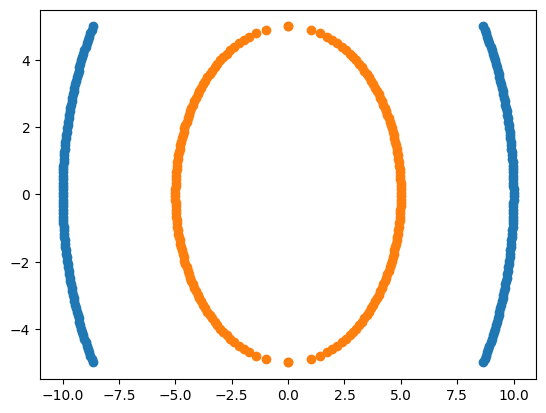

In [36]:
#plotting
plt.scatter(y,x)
plt.scatter(y1,x1)

In [37]:
# labeling
df1 = pd.DataFrame(np.vstack([y,x]).T, columns=['X1', 'X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns=['X1', 'X2'])
df2['Y'] = 1
df = pd.concat([df1, df2],ignore_index=True)
df

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0
...,...,...,...
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1


# Polynomial Kernel

$k(x,y) = (x^T+C)^d$

In [38]:
# componet of we need for the polynomial kernel : X1,X2, X1_Square, X2_Square,X1*X2
df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1*X2'] = df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [39]:
# the data into independent and dependent features
X = df[["X1", "X2", "X1_Square", "X2_Square", "X1*X2"]]
y = df.Y
X.shape, y.shape

((400, 5), (400,))

In [40]:
# splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 5), (80, 5), (320,), (80,))

In [41]:
import plotly.express as px

# Create the 3D scatter plot
fig = px.scatter_3d(df, x='X1', y='X1*X2', z='Y', color='Y')

# Save the plot as an HTML file
fig.write_html("scatter_plot.html")

# Optionally, automatically open the plot in your browser
import webbrowser
webbrowser.open("scatter_plot.html")


True

In [42]:
# now plot X1_Square, X2_Square,X1*X2
fig = px.scatter_3d(df, x='X1_Square', y='X2_Square', z='X1*X2', color='Y')
# Save the plot as an HTML file
fig.write_html("scatter_plot2.html")
# Optionally, automatically open the plot in your browser
webbrowser.open("scatter_plot2.html")

True

In [43]:
# use model 
from sklearn.svm import SVC
classifier = SVC(kernel='poly')
classifier.fit(X_train, y_train)

SVC(kernel='poly')

In [46]:
#performance matrix
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[44  0]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# Radial Base Function (RBF) kernel
$K(x₁, x₂) = exp(-||x₁ - x₂||²/(2*γ^2))$


In [47]:
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[44  0]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



#  Sigmoid kernel
K(x₁, x₂) = tanh(γ * <x₁, x₂> + c)


In [48]:
classifier = SVC(kernel='sigmoid')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[44  0]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

